In [17]:
import numpy as np

# Plot_vectors

Для визуализации векторов для вас написана специальная функция `plot_vectors()`,  которая получает Двумерный np.ndarray каждая строка которого является вектором в плоском или трехмерном пространстве. Даже если вы хотите построить один вектор, вы должны его представить в виде двумерного массива.

In [18]:
import plotly.graph_objects as go

def plot_vectors(vectors: np.ndarray, color='red', zoom = 10):
    fig = go.Figure()
    if vectors.shape[1] == 2:
      vectors = np.concatenate([vectors, np.zeros((vectors.shape[0], 1))], axis=1)
    vectors = vectors.tolist()
    for vector in vectors:
        fig.add_trace(go.Scatter3d( x=[0, vector[1]],
                                    y=[0, vector[0]],
                                    z=[0, vector[2]],
                                    mode='lines',
                                    line=dict(color=color, width=5)))
        fig.add_trace(go.Cone(x=[vector[2]], y=[vector[0]], z=[vector[1]],
                              u=[vector[2]], v=[vector[0]], w=[vector[1]],
                              showscale=False,
                              colorscale=[[0, color], [1, color]],
                              sizemode="absolute",
                              sizeref=0.5))
    title = '3D Векторы'
    fig.update_layout(title=title, scene=dict(
            xaxis=dict(title='y', range=[zoom, -zoom]),
            yaxis=dict(title='x', range=[-zoom, zoom]),
            zaxis=dict(title='z', range=[-zoom, zoom])
        ),
        scene_camera = dict(
            eye=dict(x=3, y=0.5, z=1)
        )
    )
    fig.show()

# Task_1

Даны вектора $a$ и $b$. Изучите пример визуализации этих векторов. Получите вектор $c$ согласно данной формуле. Повизуализируйте все три вектора.

$$\overrightarrow{c} = \overrightarrow{a} + \overrightarrow{b}$$

In [19]:
a = np.array([3, -2, 6])
b = np.array([2, 1, -3])
c = a + b
plot_vectors(np.array([a, b, c]))

# Theory for the following tasks

Разберем нахождение координат вектора на плоскости, если известен модуль вектора $a$ и угол $\alpha$ по отношению к оси ОХ.

\begin{cases}
  x_a = |\overrightarrow{a}|\cos{\alpha}      \\
  y_a = |\overrightarrow{a}|\sin{\alpha}
\end{cases}

Данная теория сводится к решению прямоугольного треугольника.

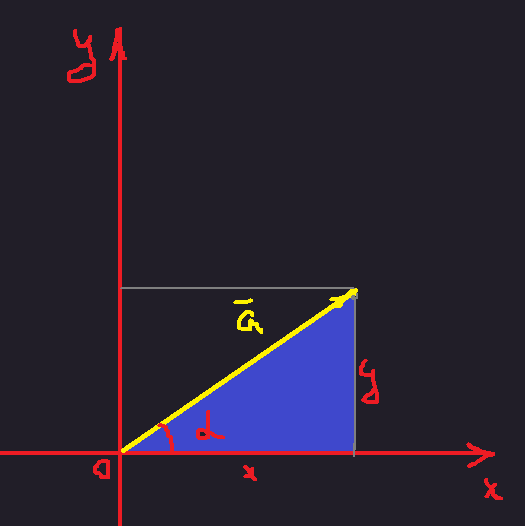

## Example_1

Найдем координаты вектора на плоскости, при данных его модуле и угле по отношению к оси OX:

In [20]:
mod = 12
angle = 90

anlge_radian = np.radians(angle)
x = mod * np.cos(anlge_radian)
y = mod * np.sin(anlge_radian)
vec = np.array([x, y])


print(f"radian: {anlge_radian}")
print(f"x:{x}; y:{y}")
print(f"vec:{vec}")
plot_vectors(np.array([vec]))

radian: 1.5707963267948966
x:7.347880794884119e-16; y:12.0
vec:[7.34788079e-16 1.20000000e+01]


Поскольку вектор представлен двумя координатами, на 3D графике он будет лежать в плоскости XOY.

## Как восстановить координаты трехмерного вектора?
Для этого нам надо знать


*   Модуль
*   Направляющие углы $\alpha$, $\beta$, $\gamma$
    * По отношению к оси OX
    * По отношению к оси OY
    * По отношению к оси OZ

В этом случае расчет координат будет осуществляться:

\begin{cases}
  x_a = |\overrightarrow{a}|\cos{\alpha}      \\
  y_a = |\overrightarrow{a}|\cos{\beta} \\
  z_a = |\overrightarrow{a}|\cos{\gamma}
\end{cases}

Где данные "косинусы" также являются направляющими.

На самом деле, нам на практике необходимо знать только два направляющих угла для трехмерного пространства, а третий мы сможем восстановить по формуле:

$$ \cos^2{\alpha} + \cos^2{\beta} + \cos^2{\gamma} = 1$$

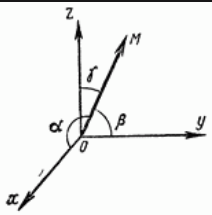



## Example_2

Восстановим координаты  вектора в трехмерном пространстве с заданным модулем и двумя направляющими углами


In [21]:
mod = 50
alpha = 70
beta = 70

In [22]:
cos_alpha = np.cos(np.radians(alpha))
cos_beta = np.cos(np.radians(beta))
cos_gamma = (1 - cos_alpha**2 - cos_beta**2)**.5
cos_alpha, cos_beta, cos_gamma

(np.float64(0.3420201433256688),
 np.float64(0.3420201433256688),
 np.float64(0.875239648964201))

In [23]:
x = mod*cos_alpha
y = mod*cos_beta
z = mod*cos_gamma
vec = np.array([x, y, z])
vec

array([17.10100717, 17.10100717, 43.76198245])

In [24]:
plot_vectors(np.array([vec]))

# Task_2

Даны два вектора $a$ и $b$ в виде модуля и угла в градусах по отношению оси OX в плоской системе координат XOY. Восстановите координаты данных векторов и найдите:
* $\overrightarrow{c} = \overrightarrow{a} + \overrightarrow{b}$ в координатах (В виде массива из двух значений)
* $|\overrightarrow{c}|$
* Угол по отношению оси OX для полученного вектора  $\overrightarrow{c}$

In [25]:
mod_a, mod_b = 12, 4
angle_a, angle_b = 30, 60
angle_rad_a, angle_rad_b = np.radians(angle_a), np.radians(angle_b)
a = np.array([mod_a * np.cos(angle_rad_a), mod_a * np.sin(angle_rad_a)])
b = np.array([mod_b * np.cos(angle_rad_b), mod_b * np.sin(angle_rad_b)])
c = a + b
plot_vectors(np.array([a, b, c]), zoom=20)
angle_c_rad = np.arctan2(c[1], c[0])
angle_c_deg = np.degrees(angle_c_rad)
print(angle_c_deg)

37.369259787569945


# Task_3

Для вектора `vec` восстановите координаты в трехмерной системе отсчета если даны модуль и два направляющих угла в градусах. Провизуализируйте результат.

In [26]:
mod = 20
alpha = 20
beta = 85
a_rad = np.radians(alpha)
b_rad = np.radians(beta)
c_rad = np.sqrt(1 - np.cos(a_rad)**2 - np.cos(b_rad)**2)
a_cos_theta = np.cos(a_rad)
b_cos_theta = np.cos(b_rad)
c_cos_theta = np.cos(c_rad)
vec = np.array([mod * a_cos_theta, mod * b_cos_theta, mod * c_cos_theta])
print(f"vec:{vec}")
plot_vectors(np.array([vec]), zoom=25) 

vec:[18.79385242  1.74311485 18.91611746]


# Task_4

Дана матрица векторов. За вектор будем считать строку матрицы. Найдите вектор-сумму всех векторов. Провизуализируйте результат.


In [27]:
vectors = np.random.randn(6, 3)*10
vectors

array([[-14.46583195,   1.95325842,  -6.77965726],
       [-13.8354793 ,  -5.44384486,   3.85567885],
       [ -3.25186378,   7.2812898 ,  29.94770018],
       [ -1.7488281 ,  -1.40337359,  15.43538364],
       [ -4.76890187,  -6.57201196,  10.72602976],
       [ -9.84645082,  -0.8809236 ,   3.1415375 ]])

In [28]:
res_vec = np.sum(vectors, axis=0)
print(res_vec)

[-47.91735582  -5.06560579  56.32667267]


In [29]:
plot_vectors(np.array([res_vec]))

# Task_5

Дано векторное выражение:

$$\overrightarrow{c} = 2\overrightarrow{a} + 3\overrightarrow{b}$$

Все вектора даны в координатах. Найдите координаты вектора $\overrightarrow{a}$, если известны остальные.

In [30]:
b = np.array([1, -4, 2])
c = np.array([3, 2, -1])

a = (c - 3 * b)/2
plot_vectors(np.array([a]))

# Task_6

Найдите скалярное произведение векторов $<\overrightarrow{a}, \overrightarrow{b}>$

In [31]:
a = [1, -4, 2]
b = [3, 2, -1]
res = np.dot(a, b)
plot_vectors(np.array([a, b]))
res

np.int64(-7)

# Task_7

Для данных векторов вычислите угол между ними.

In [32]:
a = [1, -4, 2]
b = [3, 2, -1]

cos_theta = np.dot(a, b)/( np.linalg.norm(a) * np.linalg.norm(b))
print(cos_theta)
rad = np.arccos(cos_theta)
print(rad)
print(np.degrees(rad))

plot_vectors(np.array([a, b]))

-0.4082482904638631
1.9913306620788618
114.0948425521107


# Task_8

Даны координаты вершины треугольника ABC. Расчитайте угол при вершине В.

A(2, 1, 7)

B(-1, 1, 3)

C(-8, 1, 2)

In [33]:
a = np.array([2, 1, 7])
b = np.array([-1, 1, 3])
c = np.array([-8, 1, 2])

a = a - b
c = c - b


cos_theta = np.dot(a, c)/( np.linalg.norm(a) * np.linalg.norm(c))
print(cos_theta)
rad = np.arccos(cos_theta)
print(rad)
print(np.degrees(rad))

plot_vectors(np.array([a, c]))

-0.7071067811865475
2.356194490192345
135.0


# Task_9**

Решите задачу итеративно (методом перебора).

Найдите целые значения чисел, при которых вектора перпендикулярны (косинус угла между ними равен нулю)

a = [1, m, 3]

b = [3, 6, n]

In [34]:
res = []
#a*b = 1*3 + m*6 + 3*n = 0 -> 1 + m*2 + n = 0  -> n = -1 - m*2
for m in range(-10, 11):
    n = -1 - m * 2
    res.append((m, n))

a = np.array([1, res[0][0], 3])
b = np.array([3, 6, res[0][1]])
plot_vectors(np.array([a, b]))
print(f"result:{res}")


result:[(-10, 19), (-9, 17), (-8, 15), (-7, 13), (-6, 11), (-5, 9), (-4, 7), (-3, 5), (-2, 3), (-1, 1), (0, -1), (1, -3), (2, -5), (3, -7), (4, -9), (5, -11), (6, -13), (7, -15), (8, -17), (9, -19), (10, -21)]


# Task_10

Охотник бродит по лесу в поисках зверя. Сначала он прошел 5 км на север, затем повернул на запад и прошел еще 4 км. Вдруг он слышит лай собак и устремляется к ним. Он побежал на северо-восток и пробежал 3 км. Найдите координаты охотника в момент, когда он нашел собак.

Мы должны создать координатную сетку в км, где ось OY будет направлена на север а ось OX на восток и начало координат будет соответствовать точке начала движения охотника. Каждый этап перемещения охотника можно представить как отдельный вектор. (Вектор перемещения). Если мы просуммируем данные вектора, то получим вектор, соединяющий начало координат с конечной точкой.

In [35]:
a = np.array([0, 5])
b = np.array([-4, 0])
c = np.array([np.cos(np.pi/4) * 3, np.sin(np.pi/4) * 3])
res = a + b + c
print(f"a:{a}, b:{b}, c:{c}, res:{res}")
plot_vectors(np.array([a, b, c, res]))

a:[0 5], b:[-4  0], c:[2.12132034 2.12132034], res:[-1.87867966  7.12132034]


# Task_11

Снаряд летит со скоростью около 800 метров в секунду. Затем снаряд разрывается на две части. Малая часть имеет массу 20% начальной и она устремляется строго вверх со скоростью 1000 метров в секунду.
* Рассчитайте вектор скорости для второй половины.
* Вычислите модуль скорости второй половины
* На сколько градусов отклонился вектор скорости второй половины от вектора начальной скорости.

Начальная скорость дана в векторном представлении.

Для решения задачи нам понадобится закон сохранения импульса в векторной форме. Для данной задачи он примет вид:

$$m\overrightarrow{\upsilon_0} = 0.2m\overrightarrow{\upsilon_1} + 0.8m\overrightarrow{\upsilon_2}$$

Для упрощения, массу можно сократить в уравнении.

In [36]:
v_0 = np.array([600, 500, 200])
sm_v = np.array([0, 0, 1000])

#v0 = 0.2 * v1 + 0.8 * v2
#v0 - 0.2 * v1 = 0.8 * v2
#(v0 - 0.2 * v1)/0.8 = v2
bg_v = (v_0 - 0.2 * sm_v)/0.8
norm_0 = np.linalg.norm(v_0)
norm_bg_v = np.linalg.norm(bg_v)
cos_theta = np.dot(v_0, bg_v) / (norm_0 * norm_bg_v)
degree = np.degrees(np.arccos(cos_theta))

print(f"norm_0:{norm_0}")
print(f"v_0:{v_0}, sm_v:{sm_v}, bg_v:{bg_v}")
print(f"degree:{degree}")
plot_vectors(np.array([v_0, sm_v, bg_v]))




norm_0:806.2257748298549
v_0:[600 500 200], sm_v:[   0    0 1000], bg_v:[750. 625.   0.]
degree:14.363302674070386
